In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
this_dir = Path.cwd()
dataset_file = this_dir / "data/pd_speech_features.ods" 

In [3]:
df = pd.read_excel(dataset_file, header=[0, 1], engine="odf")
df.head()

Basic Info        Baseline Features                              \
          id gender               PPE      DFA     RPDE numPulses   
0          0      1           0.85247  0.71826  0.57227       240   
1          0      1           0.76686  0.69481  0.53966       234   
2          0      1           0.85083  0.67604  0.58982       232   
3          1      0           0.41121  0.79672  0.59257       178   
4          1      0           0.32790  0.79782  0.53028       236   

                                                                     ...  \
  numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter  ...   
0              239         0.008064           0.000087      0.00218  ...   
1              233         0.008258           0.000073      0.00195  ...   
2              231         0.008340           0.000060      0.00176  ...   
3              177         0.010858           0.000183      0.00419  ...   
4              235         0.008162           0.002669      0.00535  ...   

              TQWT Features                            \
  tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0                    1.5620                    2.6445   
1                    1.5589                    3.6107   
2                    1.5643                    2.3308   
3                    3.7805                    3.5664   
4                    6.1727                    5.8416   

                                                       \
  tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                    3.8686                    4.2105   
1                   23.5155                   14.1962   
2                    9.4959                   10.7458   
3                    5.2558                   14.0403   
4                    6.0805                    5.7621   

                                                       \
  tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                    5.1221                    4.4625   
1                   11.0261                    9.5082   
2                   11.0177                    4.8066   
3                    4.2235                    4.6857   
4                    7.7817                   11.6891   

                                                       \
  tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
0                    2.6202                    3.0004   
1                    6.5245                    6.3431   
2                    2.9199                    3.1495   
3                    4.8460                    6.2650   
4                    8.2103                    5.0559   

                            Class  
  tqwt_kurtosisValue_dec_36 class  
0                   18.9405     1  
1                   45.1780     1  
2                    4.7666     1  
3                    4.0603     1  
4                    6.1164     1  

[5 rows x 755 columns]

## Feature profile

In [4]:
feature_df = pd.DataFrame(list(df.columns.values), columns=['Feature Type', 'Features'])
feature_df.head()

,Feature Type,Features
0,Basic Info,id
1,Basic Info,gender
2,Baseline Features,PPE
3,Baseline Features,DFA
4,Baseline Features,RPDE


In [5]:
grouped = feature_df.groupby('Feature Type')
feature_count = {grp_name: len(ids) for grp_name, ids in grouped.groups.items()}
del feature_count['Basic Info'], feature_count['Class']
feature_count

{'Bandwidth Parameters': 4,
 'Baseline Features': 21,
 'Formant Frequencies': 4,
 'Intensity Parameters': 3,
 'MFCC': 84,
 'TQWT Features': 432,
 'Vocal Fold': 22,
 'Wavelet Features': 182}

<BarContainer object of 8 artists>

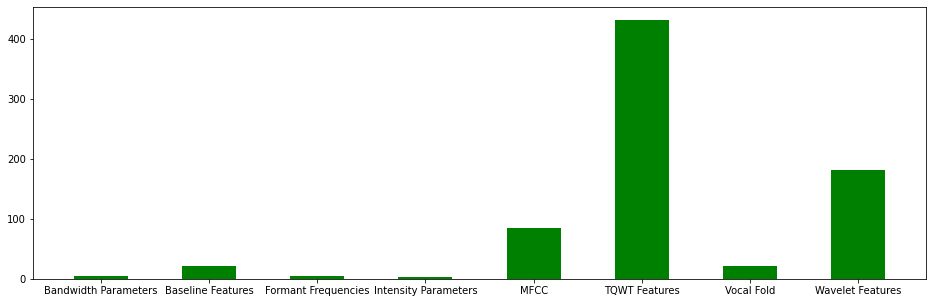

In [6]:
f, ax = plt.subplots(figsize=(16,5))
ax.bar(feature_count.keys(), feature_count.values(), width=.5, color='g')

## Participants profile

In [8]:
par_df = pd.concat([df['Basic Info'], df['Class']], axis=1)
par_df.head()

,id,gender,class
0,0,1,1
1,0,1,1
2,0,1,1
3,1,0,1
4,1,0,1


In [46]:
grouped_by_parti = par_df.groupby("id")
participants_count = len(grouped_by_parti)
print("Total No of participants : ", participants_count)

Total No of participants :  252


In [24]:
participants_profile = []
for ind , grp in grouped_by_parti:
    ag = grp['gender'].to_numpy()
    assert (ag[0] == ag).all()
    ac = grp['class'].to_numpy()
    assert (ac[0] == ac).all()
    participants_profile.append((ind, len(grp), ag[0], ac[0]))

participants_profile = pd.DataFrame(participants_profile, columns=['Participant ID', 'Instance Count', 'Gender', 'Parkinson-s disease'])
participants_profile.head()

,Participant ID,Instance Count,Gender,Parkinson-s disease
0,0,3,1,1
1,1,3,0,1
2,2,3,1,1
3,3,3,0,1
4,4,3,0,1


In [30]:
participants_profile['Instance Count'].describe()

count    252.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: Instance Count, dtype: float64

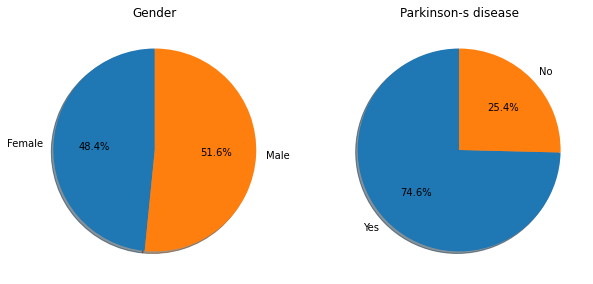

In [68]:
plt.figure(figsize=(10,10))

gender_count = participants_profile['Gender'].value_counts()
labels = ['Female', 'Male']
sizes = (gender_count[0], gender_count[1])
ax1 = plt.subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Gender')

pk_count = participants_profile['Parkinson-s disease'].value_counts()
labels = ['Yes', 'No']
sizes = (pk_count[1], pk_count[0])
ax2 = plt.subplot(122)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Parkinson-s disease')
plt.show()